# NYC Taxi Fare & Duration
## Model Training

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wget
import pickle

sys.path.append("..")

import source.configs as configs
import preprocessing as preprocessing

# Check if we are in COLAB
IN_COLAB = 'google.colab' in sys.modules

In [3]:
if not os.path.exists("../dataset/yellow_tripdata_2022-05.parquet"):
    if IN_COLAB:
        !wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-05.parquet "../dataset"
    else:
        wget.download(configs.START_DATASET_URL, "../dataset")

In [4]:
dataset = pd.read_parquet("../dataset/yellow_tripdata_2022-05.parquet")

In [5]:
dataset = preprocessing.add_features(dataset)
dataset = preprocessing.add_targets(dataset)
dataset = preprocessing.process_outliers(dataset, "delete")
dataset = preprocessing.fill_na_values(dataset)

### Features
* trip_distance
* hour_of_day: Extracted from tpep_pickup_datetime
* hour_zone: Extracted from tpep_pickup_datetime. Categorical:[Morning, Noon, Afternoon, Evening, Night]
* rush_hour: Extracted from tpep_pickup_datetime. Binary.
### Targets
* fare_amount
* trip_duration

In [6]:
columns = preprocessing.features + preprocessing.targets
train_dataset = preprocessing.select_features(dataset, columns)
train_dataset, encoders = preprocessing.create_one_hot_encodings(train_dataset, columns)
pickle.dump(encoders, open('encoders.pkl', 'wb'))

In [7]:
train_dataset.columns.to_list()

['trip_distance',
 'hour_of_day',
 'rush_hour',
 'fare_amount',
 'trip_duration',
 'day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'hour_zone_afternoon',
 'hour_zone_evening',
 'hour_zone_morning',
 'hour_zone_night',
 'hour_zone_noon']

In [8]:
for col in train_dataset.isna().sum():
    assert col==0
print("Ok, no NAs in train dataset.")

Ok, no NAs in train dataset.


In [9]:
train_dataset.describe()

,trip_distance,hour_of_day,rush_hour,fare_amount,trip_duration,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_zone_afternoon,hour_zone_evening,hour_zone_morning,hour_zone_night,hour_zone_noon
count,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06,2.976593e+06
mean,3.514028e+00,1.414663e+01,3.146419e-01,1.445461e+01,1.625068e+01,1.317970e-01,1.434214e-01,1.480747e-01,1.516029e-01,1.431217e-01,1.361469e-01,1.458355e-01,3.036475e-01,2.434874e-01,2.287918e-01,1.673118e-01,5.676154e-02
std,4.241348e+00,5.758340e+00,4.643732e-01,1.186018e+01,1.270762e+01,3.382700e-01,3.505021e-01,3.551740e-01,3.586356e-01,3.501970e-01,3.429446e-01,3.529413e-01,4.598323e-01,4.291869e-01,4.200549e-01,3.732540e-01,2.313864e-01
min,1.000000e-01,0.000000e+00,0.000000e+00,2.500000e+00,2.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.170000e+00,1.000000e+01,0.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.920000e+00,1.500000e+01,0.000000e+00,1.050000e+01,1.268333e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.600000e+00,1.900000e+01,1.000000e+00,1.600000e+01,2.038333e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.500000e+01,2.300000e+01,1.000000e+00,7.500000e+01,9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
train_dataset.columns.to_list()

['trip_distance',
 'hour_of_day',
 'rush_hour',
 'fare_amount',
 'trip_duration',
 'day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'hour_zone_afternoon',
 'hour_zone_evening',
 'hour_zone_morning',
 'hour_zone_night',
 'hour_zone_noon']

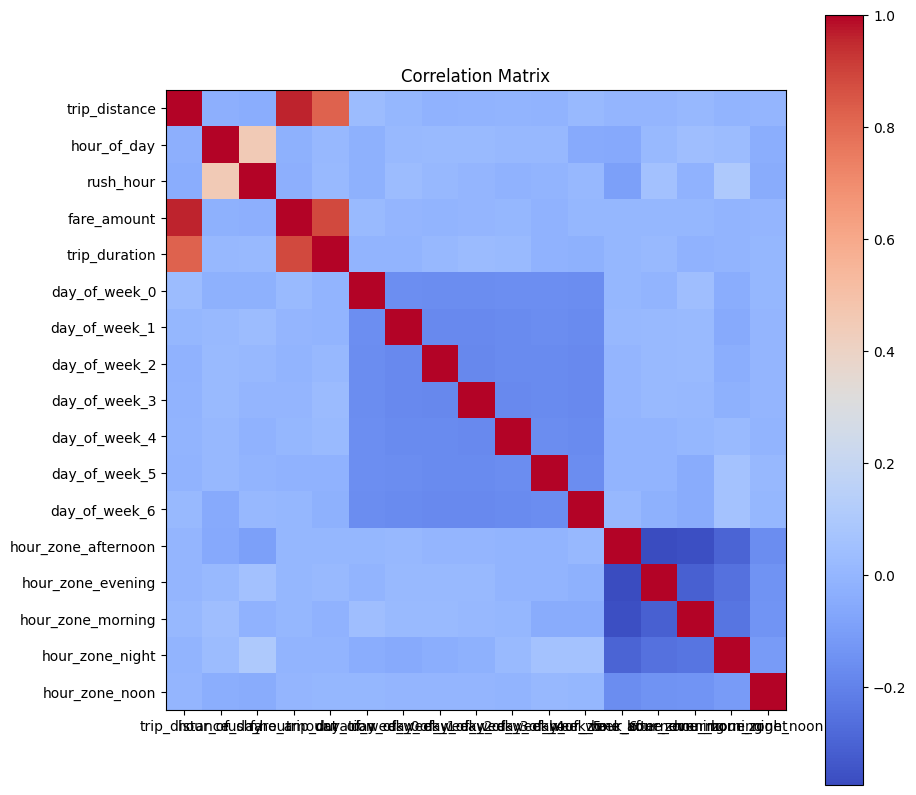

In [11]:
correlation_matrix = train_dataset.corr()
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Add a colorbar to show the scale
plt.title('Correlation Matrix')
plt.xticks(ticks=range(len(correlation_matrix)), labels=correlation_matrix.columns)
plt.yticks(ticks=range(len(correlation_matrix)), labels=correlation_matrix.columns)
plt.show()

## Model Training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Split dataset

In [13]:
# Split features and targets
X, y = preprocessing.split_dataset(train_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_td = y_train["trip_duration"]
y_train_fa = y_train["fare_amount"]

Model preparation

In [14]:
scaler = None
X_train_scaled = X_train
X_test_scaled = X_test

## LINEAR MODEL

In [15]:
from sklearn.linear_model import LinearRegression
linreg_model_td = LinearRegression(n_jobs=-1)
linreg_model_fa = LinearRegression(n_jobs=-1)

In [16]:
print("Fit model TD")
linreg_model_td.fit(X_train_scaled, y_train_td.values.ravel());
print("Fit model FA")
linreg_model_fa.fit(X_train_scaled, y_train_fa.values.ravel());

Fit model TD
Fit model FA


In [17]:
test_predictions_fa = linreg_model_fa.predict(X_test_scaled)
test_predictions_td = linreg_model_td.predict(X_test_scaled)

y_test_td = y_test["trip_duration"]
mse_td = mean_squared_error(y_test_td, test_predictions_td)**0.5
r2_td = r2_score(y_test_td, test_predictions_td)
print(f"Trip duration MSE: {mse_td} minutes")
print(f"Trip duration R2: {r2_td}")

y_test_fa = y_test["fare_amount"]
mse_fa = mean_squared_error(y_test_fa, test_predictions_fa)**0.5
r2_fa = r2_score(y_test_fa, test_predictions_fa)
print(f"Fare amount MSE: {mse_fa} $")
print(f"Fare amount R2: {r2_fa}")

Trip duration MSE: 7.1465010457552145 minutes
Trip duration R2: 0.6830549018314522
Fare amount MSE: 3.334760600921611 $
Fare amount R2: 0.9207771149171728


In [18]:
pickle.dump(linreg_model_fa, open('linreg_model_fa.pkl', 'wb'))
pickle.dump(linreg_model_td, open('linreg_model_td.pkl', 'wb'))

## MODEL RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_model_td = RandomForestRegressor(n_jobs=-1,
                                    n_estimators=10)
rf_model_fa = RandomForestRegressor(n_jobs=-1,
                                    n_estimators=10 )

In [20]:
print("Fit model TD")
rf_model_td.fit(X_train_scaled, y_train_td.values.ravel());
print("Fit model FA")
rf_model_fa.fit(X_train_scaled, y_train_fa.values.ravel());

Fit model TD
Fit model FA


In [21]:
test_predictions_fa = rf_model_fa.predict(X_test_scaled)
test_predictions_td = rf_model_td.predict(X_test_scaled)

y_test_td = y_test["trip_duration"]
mse_td = mean_squared_error(y_test_td, test_predictions_td)**0.5
r2_td = r2_score(y_test_td, test_predictions_td)
print(f"Trip duration MSE: {mse_td} minutes")
print(f"Trip duration R2: {r2_td}")

y_test_fa = y_test["fare_amount"]
mse_fa = mean_squared_error(y_test_fa, test_predictions_fa)**0.5
r2_fa = r2_score(y_test_fa, test_predictions_fa)
print(f"Fare amount MSE: {mse_fa} $")
print(f"Fare amount R2: {r2_fa}")

Trip duration MSE: 5.899043023344491 minutes
Trip duration R2: 0.7840465018358139
Fare amount MSE: 3.1877169594051833 $
Fare amount R2: 0.9276096233066897


In [22]:
pickle.dump(rf_model_fa, open('rf_model_fa.pkl', 'wb'))
pickle.dump(rf_model_td, open('rf_model_td.pkl', 'wb'))

## MODEL LIGHT GBM

In [23]:

print("Model LightGBM")
import lightgbm as lgb
train_data_lgb_td = lgb.Dataset(X_train_scaled, label=y_train_td)
train_data_lgb_fa = lgb.Dataset(X_train_scaled, label=y_train_fa)
params = {
'objective': 'regression',  # 'regression' for regression problems
'metric': 'rmse',          # Root Mean Squared Error for evaluation
'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
'num_leaves': 100,          # Maximum number of leaves in one tree
'learning_rate': 0.05,     # Learning rate
'feature_fraction': 0.9,   # Fraction of features to be used in each iteration
'bagging_fraction': 0.8,   # Fraction of data to be used for bagging
'bagging_freq': 5,         # Frequency for bagging
'verbose': 1               # Verbosity (0: silent, 1: progress bar, 2: print all)
}
num_rounds = 100  # Number of boosting rounds (iterations)

Model LightGBM


In [24]:
print("Training LGBM")
print("Fit model TD")
lgbm_model_td = lgb.train(params, train_data_lgb_td, num_rounds)
print("Fit model FA")
lgbm_model_fa = lgb.train(params, train_data_lgb_fa, num_rounds)
print("Done!")

Training LGBM
Fit model TD
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 2381274, number of used features: 15
[LightGBM] [Info] Start training from score 16.255198
Fit model FA
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 2381274, number of used features: 15
[LightGBM] [Info] Start training from score 14.458650
Done!


In [25]:
test_predictions_fa = lgbm_model_fa.predict(X_test_scaled)
test_predictions_td = lgbm_model_td.predict(X_test_scaled)

y_test_td = y_test["trip_duration"]
mse_td = mean_squared_error(y_test_td, test_predictions_td)**0.5
r2_td = r2_score(y_test_td, test_predictions_td)
print(f"Trip duration MSE: {mse_td} minutes")
print(f"Trip duration R2: {r2_td}")

y_test_fa = y_test["fare_amount"]
mse_fa = mean_squared_error(y_test_fa, test_predictions_fa)**0.5
r2_fa = r2_score(y_test_fa, test_predictions_fa)
print(f"Fare amount MSE: {mse_fa} $")
print(f"Fare amount R2: {r2_fa}")


Trip duration MSE: 5.3339808361314205 minutes
Trip duration R2: 0.8234368703420935
Fare amount MSE: 2.9074254442208685 $
Fare amount R2: 0.9397803115657803


In [26]:
pickle.dump(lgbm_model_fa, open('lgbm_model_fa.pkl', 'wb'))
pickle.dump(lgbm_model_td, open('lgbm_model_td.pkl', 'wb'))

# Inference

In [27]:
model_prefix = "rf"
model_name_td = f"{model_prefix}_model_td.pkl"
model_name_fa = f"{model_prefix}_model_fa.pkl"

print(model_name_td)
print(model_name_fa)

if os.path.exists(model_name_td):
    with open(model_name_td, "rb") as model_td_fd:
        model_td = pickle.load(model_td_fd)
else:
    print("TD model not found!")

if os.path.exists(model_name_fa):
    with open(model_name_fa, "rb") as model_fa_fd:
        model_fa = pickle.load(model_fa_fd)
else:
    print("FA model not found!")

if os.path.exists("encoders.pkl"):
    with open("encoders.pkl", "rb") as encoders_file:
        encoders = pickle.load(encoders_file)
else:
    print("Encoders model not found!")

rf_model_td.pkl
rf_model_fa.pkl


Input

In [28]:
pickup_date="2023/12/12"
pickup_time="12:15:12"
tpep_pickup_datetime = pickup_date + " " + pickup_time
trip_distance = "5.5"

In [29]:
data = {
    "trip_distance": [float(trip_distance)], 
    "tpep_pickup_datetime": [pd.to_datetime(tpep_pickup_datetime)] }
df = pd.DataFrame(data)
df = preprocessing.add_features(df)
df.drop(columns="tpep_pickup_datetime", inplace=True)

In [30]:
for encoder_model in encoders:
    encoder, col = encoder_model
    array = pd.DataFrame(df[col].values.reshape(1,-1), columns=[col])
    encoded_data = encoder.transform(array)
    encoded_data = encoded_data.toarray()
    encoded_df = pd.DataFrame(encoded_data, 
                            columns=encoder.get_feature_names_out([col])
    )
    df = pd.concat([df, encoded_df], axis=1, join="inner")
    df.drop(columns=col, inplace=True)

In [31]:
df.columns.to_list()

['trip_distance',
 'hour_of_day',
 'rush_hour',
 'day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'hour_zone_afternoon',
 'hour_zone_evening',
 'hour_zone_morning',
 'hour_zone_night',
 'hour_zone_noon']

In [33]:
y_fa = round(model_fa.predict(df)[0],2)
y_td = int(model_td.predict(df)[0])
y_fa, y_td

(21.5, 23)